from MelPrp0628A1__crop_dark_edge
resize to 224

# start

In [1]:
PRFX = 'MelPrp0909C512'
PRFX_B4 = 'MelPrp0628A1'

In [2]:
SZ = 512

# setup

In [3]:
from pathlib import Path
import pickle
import pandas as pd
import random
import os
import numpy as np
import matplotlib.pyplot as plt
from joblib import Parallel, delayed

from PIL import Image

import datetime
def dtnow(): return datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')


In [4]:
p_cmp = '../input/siim-isic-melanoma-classification'
p_b4 = f'../output/{PRFX_B4}'
p_out = f'../output/{PRFX}'; Path(p_out).mkdir(exist_ok=True,parents=True)

In [5]:
mkdir -p $p_out/siim-isic-melanoma-classification/jpeg/train

In [6]:
mkdir -p $p_out/siim-isic-melanoma-classification/jpeg/test

In [7]:
mkdir -p $p_out/andrewmvd--isic-2019/ISIC_2019_Training_Input/ISIC_2019_Training_Input

# process csv

In [8]:
ls $p_b4

andrewmvd--isic-2019/               test.csv       train_all_original.csv
siim-isic-melanoma-classification/  train_all.csv


In [9]:
train_all0=pd.read_csv(f'{p_b4}/train_all.csv')
test0=pd.read_csv(f'{p_b4}/test.csv')

train_all=train_all0.copy()
test=test0.copy()

In [10]:
print(train_all0.shape)
train_all0.head()

(58457, 4)


,source,im_pth,patient_id,target
0,20,../output/MelPrp0628A1/siim-isic-melanoma-clas...,IP_7279968,0.0
1,20,../output/MelPrp0628A1/siim-isic-melanoma-clas...,IP_3075186,0.0
2,20,../output/MelPrp0628A1/siim-isic-melanoma-clas...,IP_2842074,0.0
3,20,../output/MelPrp0628A1/siim-isic-melanoma-clas...,IP_6890425,0.0
4,20,../output/MelPrp0628A1/siim-isic-melanoma-clas...,IP_8723313,0.0


In [11]:
train_all.im_pth = train_all.im_pth.apply(lambda x: x.replace(PRFX_B4, PRFX))
train_all.head()

,source,im_pth,patient_id,target
0,20,../output/MelPrp0909C512/siim-isic-melanoma-cl...,IP_7279968,0.0
1,20,../output/MelPrp0909C512/siim-isic-melanoma-cl...,IP_3075186,0.0
2,20,../output/MelPrp0909C512/siim-isic-melanoma-cl...,IP_2842074,0.0
3,20,../output/MelPrp0909C512/siim-isic-melanoma-cl...,IP_6890425,0.0
4,20,../output/MelPrp0909C512/siim-isic-melanoma-cl...,IP_8723313,0.0


In [12]:
print(test0.shape)
test0.head()

(10982, 6)


,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,im_pth
0,ISIC_0052060,IP_3579794,male,70.0,NaN,../output/MelPrp0628A1/siim-isic-melanoma-clas...
1,ISIC_0052349,IP_7782715,male,40.0,lower extremity,../output/MelPrp0628A1/siim-isic-melanoma-clas...
2,ISIC_0058510,IP_7960270,female,55.0,torso,../output/MelPrp0628A1/siim-isic-melanoma-clas...
3,ISIC_0073313,IP_6375035,female,50.0,torso,../output/MelPrp0628A1/siim-isic-melanoma-clas...
4,ISIC_0073502,IP_0589375,female,45.0,lower extremity,../output/MelPrp0628A1/siim-isic-melanoma-clas...


In [13]:
test.im_pth = test.im_pth.apply(lambda x: x.replace(PRFX_B4, PRFX))
test.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,im_pth
0,ISIC_0052060,IP_3579794,male,70.0,NaN,../output/MelPrp0909C512/siim-isic-melanoma-cl...
1,ISIC_0052349,IP_7782715,male,40.0,lower extremity,../output/MelPrp0909C512/siim-isic-melanoma-cl...
2,ISIC_0058510,IP_7960270,female,55.0,torso,../output/MelPrp0909C512/siim-isic-melanoma-cl...
3,ISIC_0073313,IP_6375035,female,50.0,torso,../output/MelPrp0909C512/siim-isic-melanoma-cl...
4,ISIC_0073502,IP_0589375,female,45.0,lower extremity,../output/MelPrp0909C512/siim-isic-melanoma-cl...


In [14]:
train_all.to_csv(f'{p_out}/train_all.csv', index=False)
test.to_csv(f'{p_out}/test.csv', index=False)

## dedup

In [15]:
train_all_dedup = train_all.copy()

df_dup = pd.read_csv('../input/siim-isic-melanoma-classification/2020_Challenge_duplicates.csv')
df_dup_train = df_dup[df_dup.partition=='train']
for id_dup in df_dup_train.ISIC_id_paired:
    train_all_dedup = train_all_dedup[~train_all_dedup.im_pth.str.contains(id_dup)]
len(df_dup_train)+len(train_all_dedup), len(train_all)

(58457, 58457)

In [16]:
train_all_dedup.to_csv(f'{p_out}/train_all_dedup.csv', index=False)

# process image

../output/MelPrp0628A1/siim-isic-melanoma-classification/jpeg/train/ISIC_4483719.jpg
(639, 479)


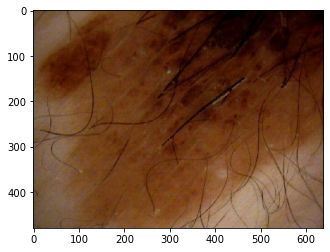

In [17]:
fnm = np.random.choice(train_all0.im_pth)
print(fnm)
im = Image.open(fnm)
print(im.size)
plt.imshow(im)
plt.show()

../output/MelPrp0909C512/siim-isic-melanoma-classification/jpeg/train/ISIC_4483719.jpg
(512, 512)


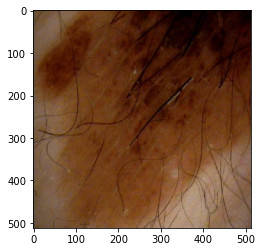

In [18]:
fnm_new = fnm.replace(PRFX_B4, PRFX)
print(fnm_new)
im_new = im.resize((SZ, SZ))
print(im_new.size)
plt.imshow(im_new)
plt.show()

In [19]:
def process(fnm):
    fnm_new = fnm.replace(PRFX_B4, PRFX)
    if os.path.exists(fnm_new): return
    im = Image.open(fnm)
    im_new = im.resize((SZ, SZ))
    im_new.save(fnm_new)

In [20]:
im_pths_2_process = list(train_all0.im_pth.values)+list(test0.im_pth.values)
len(im_pths_2_process)

69439

In [21]:
Parallel(n_jobs=8, verbose=10)(delayed(process)(fnm) for fnm in im_pths_2_process)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    1.6s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    4.6s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    7.4s
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:   10.4s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   13.6s
[Parallel(n_jobs=8)]: Done  45 tasks      | elapsed:   14.4s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:   17.8s
[Parallel(n_jobs=8)]: Done  69 tasks      | elapsed:   22.8s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:   26.5s
[Parallel(n_jobs=8)]: Done  97 tasks      | elapsed:   30.1s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:   33.8s
[Parallel(n_jobs=8)]: Done 129 tasks      | elapsed:   37.3s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:   40.9s
[Parallel(n_jobs=8)]: Done 165 tasks      | elapsed:   42.9s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:   47.2s
[Parallel(

[Parallel(n_jobs=8)]: Done 9506 tasks      | elapsed: 37.1min
[Parallel(n_jobs=8)]: Done 9645 tasks      | elapsed: 37.6min
[Parallel(n_jobs=8)]: Done 9784 tasks      | elapsed: 38.2min
[Parallel(n_jobs=8)]: Done 9925 tasks      | elapsed: 38.7min
[Parallel(n_jobs=8)]: Done 10066 tasks      | elapsed: 39.2min
[Parallel(n_jobs=8)]: Done 10209 tasks      | elapsed: 39.9min
[Parallel(n_jobs=8)]: Done 10352 tasks      | elapsed: 40.3min
[Parallel(n_jobs=8)]: Done 10497 tasks      | elapsed: 40.9min
[Parallel(n_jobs=8)]: Done 10642 tasks      | elapsed: 41.4min
[Parallel(n_jobs=8)]: Done 10789 tasks      | elapsed: 42.0min
[Parallel(n_jobs=8)]: Done 10936 tasks      | elapsed: 42.5min
[Parallel(n_jobs=8)]: Done 11085 tasks      | elapsed: 43.1min
[Parallel(n_jobs=8)]: Done 11234 tasks      | elapsed: 43.7min
[Parallel(n_jobs=8)]: Done 11385 tasks      | elapsed: 44.2min
[Parallel(n_jobs=8)]: Done 11536 tasks      | elapsed: 44.8min
[Parallel(n_jobs=8)]: Done 11689 tasks      | elapsed: 45.4

[Parallel(n_jobs=8)]: Done 37826 tasks      | elapsed: 117.9min
[Parallel(n_jobs=8)]: Done 38360 tasks      | elapsed: 118.0min
[Parallel(n_jobs=8)]: Done 38898 tasks      | elapsed: 118.1min
[Parallel(n_jobs=8)]: Done 39436 tasks      | elapsed: 118.2min
[Parallel(n_jobs=8)]: Done 39978 tasks      | elapsed: 118.3min
[Parallel(n_jobs=8)]: Done 40520 tasks      | elapsed: 118.3min
[Parallel(n_jobs=8)]: Done 41066 tasks      | elapsed: 118.4min
[Parallel(n_jobs=8)]: Done 41612 tasks      | elapsed: 118.5min
[Parallel(n_jobs=8)]: Done 42162 tasks      | elapsed: 118.6min
[Parallel(n_jobs=8)]: Done 42712 tasks      | elapsed: 118.7min
[Parallel(n_jobs=8)]: Done 43266 tasks      | elapsed: 118.8min
[Parallel(n_jobs=8)]: Done 43820 tasks      | elapsed: 118.9min
[Parallel(n_jobs=8)]: Done 44378 tasks      | elapsed: 118.9min
[Parallel(n_jobs=8)]: Done 44936 tasks      | elapsed: 119.0min
[Parallel(n_jobs=8)]: Done 45498 tasks      | elapsed: 119.1min
[Parallel(n_jobs=8)]: Done 46060 tasks  

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

# inspect results

../output/MelPrp0628A1/siim-isic-melanoma-classification/jpeg/train/ISIC_3350519.jpg


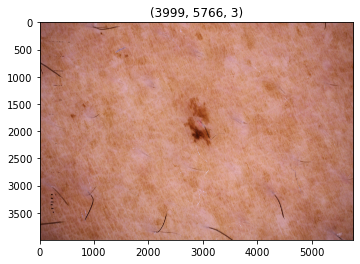

../output/MelPrp0909C512/siim-isic-melanoma-classification/jpeg/train/ISIC_3350519.jpg


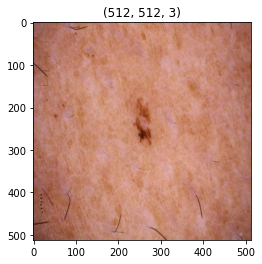

../output/MelPrp0628A1/andrewmvd--isic-2019/ISIC_2019_Training_Input/ISIC_2019_Training_Input/ISIC_0028781.jpg


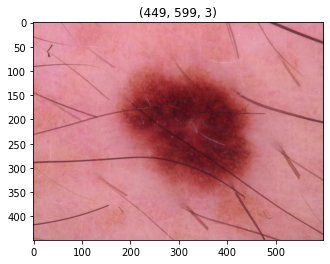

../output/MelPrp0909C512/andrewmvd--isic-2019/ISIC_2019_Training_Input/ISIC_2019_Training_Input/ISIC_0028781.jpg


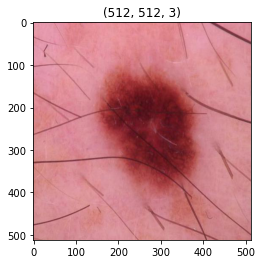

../output/MelPrp0628A1/siim-isic-melanoma-classification/jpeg/train/ISIC_4254687.jpg


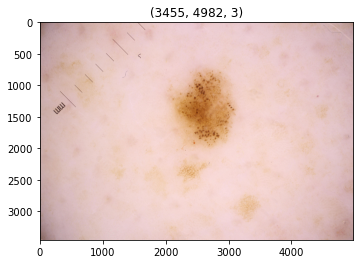

../output/MelPrp0909C512/siim-isic-melanoma-classification/jpeg/train/ISIC_4254687.jpg


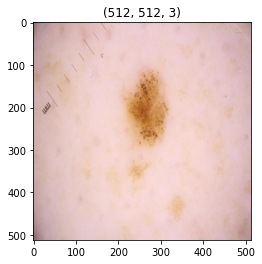

../output/MelPrp0628A1/siim-isic-melanoma-classification/jpeg/train/ISIC_7720522.jpg


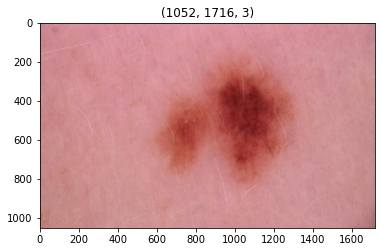

../output/MelPrp0909C512/siim-isic-melanoma-classification/jpeg/train/ISIC_7720522.jpg


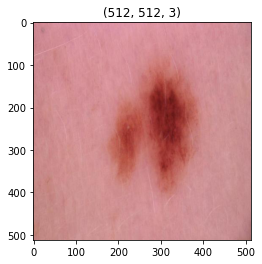

../output/MelPrp0628A1/siim-isic-melanoma-classification/jpeg/test/ISIC_2849601.jpg


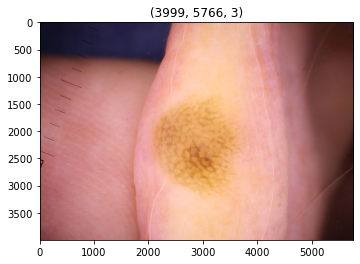

../output/MelPrp0909C512/siim-isic-melanoma-classification/jpeg/test/ISIC_2849601.jpg


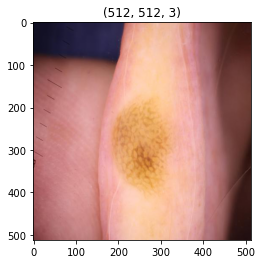

In [23]:
fnms = np.random.choice(im_pths_2_process, 5, replace=False)
for fnm in fnms:
    print(fnm)
    img = plt.imread(fnm)
    plt.title(f'{img.shape}')
    plt.imshow(img)
    plt.show()
    
    fnm_new = fnm.replace(PRFX_B4, PRFX)
    print(fnm_new)
    img = plt.imread(fnm_new)
    plt.title(f'{img.shape}')
    plt.imshow(img)
    plt.show()
    